<a href="https://colab.research.google.com/github/edelgado-1975/PythonSena/blob/main/6_Jugando_con_Python%20ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

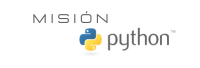

#Jugando con Python



1.	**Piedra papel o tijera:**  Debes preguntar al usuario una opción entre piedra, papel o tijera y una vez ingresada su opción se debe mostrar la opción ingresada por el usuario y la obtenida de manera aleatoria por el computador.  El programa debe indicar el ganador con base en las siguientes reglas: Piedra gana a Tijera, Tijera gana a Papel, Papel gana a Piedra.  En caso de empate se debe continuar hasta que haya un ganador.  Utiliza funciones.

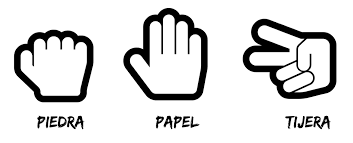




In [1]:
import random

def obtener_opcion_usuario():
    while True:
        try:
            opcion = input("Elige una opción: piedra, papel o tijera: ").lower()
            if opcion in ["piedra", "papel", "tijera"]:
                return opcion
            else:
                print("Opción no válida. Inténtalo de nuevo.")
        except KeyboardInterrupt:
            print("\nHas interrumpido el juego. Adiós.")
            exit()

def obtener_opcion_computadora():
    opciones = ["piedra", "papel", "tijera"]
    return random.choice(opciones)

def determinar_ganador(usuario, computadora):
    if usuario == computadora:
        return "Empate"
    elif (usuario == "piedra" and computadora == "tijera") or (usuario == "tijera" and computadora == "papel") or (usuario == "papel" and computadora == "piedra"):
        return "Ganaste"
    else:
        return "La computadora ganó"

while True:
    try:
        usuario = obtener_opcion_usuario()
        computadora = obtener_opcion_computadora()

        print(f"Tú elegiste: {usuario}")
        print(f"La computadora eligió: {computadora}")

        resultado = determinar_ganador(usuario, computadora)
        print(resultado)

        jugar_de_nuevo = input("¿Quieres jugar de nuevo? (si/no): ").lower()
        if jugar_de_nuevo != "si":
            break
    except KeyboardInterrupt:
        print("\nHas interrumpido el juego. Adiós.")
        exit()


Elige una opción: piedra, papel o tijera: tijera
Tú elegiste: tijera
La computadora eligió: piedra
La computadora ganó
¿Quieres jugar de nuevo? (si/no): si
Elige una opción: piedra, papel o tijera: papel
Tú elegiste: papel
La computadora eligió: papel
Empate
¿Quieres jugar de nuevo? (si/no): no


2. **Ahorcado:**  Debes presentar el siguiente menú al usuario


1.   Agregar Palabra (solicita una palabra y la agregas a una lista de palabras)
2.  Configurar (debes preguntar el número de equivocaciones permitidas)
3.	Jugar
4.	Salir


La opción 3 de jugar debe obtener una palabra aleatoriamente de la lista de palabras y presentar en pantalla los espacios de cada letra de la palabra seleccionada.  Por ejemplo, si la palabra es paciencia, se debe mostrar en pantalla así _ _ _ _ _ _ _ _ _  Posteriormente, debe preguntar una letra al usuario y si la letra se encuentra, debe mostrarla en la posición correcta.  Para el caso anterior, si la letra seleccionada es la a, se debería mostrar así
_ A _ _ _ _ _ _ A En caso de error debe indicar cuantas oportunidades le quedan para adivinar.  El juego termina cuando el usuario llena la palabra antes de terminar sus oportunidades (en ese caso gana) o cuando se terminan sus oportunidades sin llenar la palabra (en ese caso pierde).  Al perder o ganar se debe presentar un mensaje indicando cual era la palabra escondida.      Usar funciones y gestión de excepciones
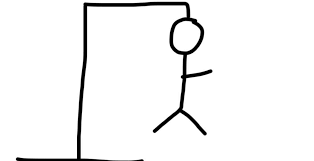

In [ ]:
import random

# Variables globales
palabras = []
intentos_permitidos = 6

def agregar_palabra():
    palabra = input("Ingresa una palabra para agregar al juego: ").lower()
    palabras.append(palabra)
    print(f'La palabra "{palabra}" ha sido agregada.')

def configurar_intentos():
    global intentos_permitidos
    while True:
        try:
            intentos = int(input("Ingresa el número de intentos permitidos (por defecto 6): "))
            if intentos > 0:
                intentos_permitidos = intentos
                break
            else:
                print("El número de intentos debe ser mayor que cero.")
        except ValueError:
            print("Ingresa un número válido.")

def seleccionar_palabra():
    return random.choice(palabras)

def inicializar_palabra_oculta(palabra):
    return ['_'] * len(palabra)

def mostrar_palabra_oculta(palabra_oculta):
    return ' '.join(palabra_oculta)

def jugar():
    palabra = seleccionar_palabra()
    palabra_oculta = inicializar_palabra_oculta(palabra)
    oportunidades = intentos_permitidos

    print("¡Comencemos a jugar!")
    print(f"Palabra: {mostrar_palabra_oculta(palabra_oculta)}")

    while True:
        letra = input("Adivina una letra: ").lower()

        if letra in palabra:
            for i in range(len(palabra)):
                if palabra[i] == letra:
                    palabra_oculta[i] = letra

            print(f"Palabra: {mostrar_palabra_oculta(palabra_oculta)}")

            if '_' not in palabra_oculta:
                print("¡Has ganado! La palabra era:", palabra)
                break
        else:
            oportunidades -= 1
            print(f"Letra incorrecta. Te quedan {oportunidades} oportunidades.")

        if oportunidades == 0:
            print("¡Has perdido! La palabra era:", palabra)
            break

def main():
    while True:
        print("\nMenú:")
        print("1. Agregar Palabra")
        print("2. Configurar Intentos Permitidos")
        print("3. Jugar")
        print("4. Salir")

        opcion = input("Elige una opción: ")

        if opcion == '1':
            agregar_palabra()
        elif opcion == '2':
            configurar_intentos()
        elif opcion == '3':
            if len(palabras) == 0:
                print("Debes agregar palabras antes de jugar.")
            else:
                jugar()
        elif opcion == '4':
            print("¡Adiós!")
            break
        else:
            print("Opción no válida. Por favor, elige una opción del menú.")

if __name__ == "__main__":
    main()
